# <center>第11章 时间序列</center>

## 11.1 日期和时间数据类型及工具


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse

In [1]:
now=datetime.now()
print(now)
print(now.year,now.month,now.day,now.hour)
#将时间转化为时间戳
a.timestamp

#timedelta
a=datetime(2018,9,10,12,33)
b=datetime(2019,12,3,19,8)


#dateutil几乎可以解析人类能够理解的日期表示形式
a='2017/2/3'
parse(a)
b='Jan 31,1997 10:45 am'
parse(b)
#在国际通用的格式中，日在月前面很普遍，传入dayfirst=True就可以了
parse('6/12/2011',dayfirst=True)

#pandas解析标准日期
date_str=['2019-07-06 12:00:03','2019-08-09 13:13:11','']
pd.to_datetime(date_str)
a=pd.to_datetime(date_str)
type(a[0])

## 11.2 时间序列基础

### 1.DatatimeIndex对象

In [4]:
from datetime import datetime
import numpy as np
import pandas as pd

- 直接传入datetime对象构造时间序列

In [7]:
dates=[datetime(2011,1,2),datetime(2011,1,5),
        datetime(2011,1,7),datetime(2011,1,8),
        datetime(2011,1,10),datetime(2011,1,12)]
ts=pd.Series(np.random.randn(6),index=dates)
#返回一个DatetimeIndex对象，由timestamp构成
ts.index
type(ts.index[0])

#跟其他Series一样，不同索引的时间序列之间的运算会按index对齐
ts+ts[::2]

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

pandas._libs.tslibs.timestamps.Timestamp

2011-01-02    2.580655
2011-01-05         NaN
2011-01-07   -0.964280
2011-01-08         NaN
2011-01-10    1.540072
2011-01-12         NaN
dtype: float64

- 使用pd.to_datetime将字符串转化为时间序列index

In [8]:
date=['2019/2/4','2019/3/4']
pd.to_datetime(date)

DatetimeIndex(['2019-02-04', '2019-03-04'], dtype='datetime64[ns]', freq=None)

['2019/2/4', '2019/3/4']


### 2.索引、选取、子集构造

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [7]:
dates=[datetime(2011,1,2),datetime(2011,1,5),
        datetime(2011,1,7),datetime(2011,1,8),
        datetime(2011,1,10),datetime(2011,1,12)]
ts=pd.Series(np.random.randn(6),index=dates)
stamp=ts.index[2]
ts[stamp]

#传入一个可以被解释为日期的字符串,就可以实现索引
ts['2011/1/5']
ts['20110105']
#datetime对象也可以切片
ts['2011-1-5':]
ts[datetime(2011,1,5):]
#这个也可以，不过注意步进是按照series来的，不是按时间来的
ts[datetime(2011,1,7)::2]
#由于大部分时间序列数据都是按照时间先后排列的，因此，你也可以用不存在于该序列中的时间戳对其切片
ts[datetime(2011,1,9):]
#对于较长的时间序列，只需传入'年'或者'年月'即可轻松选取数据的切片
longer_ts=pd.Series(np.random.randn(1000),index=pd.date_range('2000/1/1',periods=1000))
print(longer_ts.head(5))
#比如说要获得5月份的数据
longer_ts['2000-05']
#切片
longer_ts[datetime(2001,2,2):datetime(2003,2,8)]

#还有一个等价的办法也可以截取两个时间日期之间的Series
# ts.truncate(before,after,axis,copy(bool))
ts.truncate(after='2011-1-6')

#这些索引对DataFrame同样有效
date=pd.date_range('2001-1-1',periods=100,freq='W-THU')
date_1=pd.date_range('2001-1-1',periods=4,freq='Y')
df=pd.DataFrame(np.random.randn(100,4),index=date,columns=date_1)
df['2001':'2003']
df.loc['2001-01':'2002-03']

2000-01-01    2.280889
2000-01-02    1.191388
2000-01-03   -2.157509
2000-01-04    0.606439
2000-01-05    1.348917
Freq: D, dtype: float64


,2001-12-31 00:00:00,2002-12-31 00:00:00,2003-12-31 00:00:00,2004-12-31 00:00:00
2001-01-04,2.117965,-1.058711,-0.548315,-1.582022
2001-01-11,-0.298024,-0.866429,-0.337269,-2.632261
2001-01-18,-0.377953,-0.344914,-0.090029,-0.979966
2001-01-25,0.831877,0.507370,1.112137,0.357263
2001-02-01,-0.198154,0.076994,0.803819,1.457046
2001-02-08,0.229013,-0.534590,0.250387,0.835561
2001-02-15,0.254507,-0.127585,-0.174553,0.292854
2001-02-22,-0.596166,-1.285598,-0.077126,0.043754
2001-03-01,1.626449,-0.704081,0.974380,0.209992
2001-03-08,0.770617,-0.778238,1.643298,0.760754


### 3.带有重复索引的时间序列

In [ ]:
import pandas as pd 
import numpy as np
from datetime import datetime 

In [10]:
#dates=pd.to_datetime(['2000/1/1','2000/1/2','2000/1/2','2000/1/3','2000/1/3'])
dates=pd.DatetimeIndex(['2000/1/1','2000/1/2','2000/1/2','2000/1/2','2000/1/3'])
ts=pd.Series(np.arange(5),index=dates)
ts
ts.index.is_unique

#假如想对时间戳数据进行聚合，用groupby
ts.index.name='hello'
a=ts.groupby('hello')
a.count()
for m,n in a:
    print(n)

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

False

hello
2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

hello
2000-01-01    0
dtype: int32
hello
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32
hello
2000-01-03    4
dtype: int32


## 11.3 日期的范围、频率以及移动

### 1.data_range生成日期范围

In [ ]:
import pandas as pd 
import numpy as np
from datetime import datetime

- 使用pd.date_range生成日期范围:

>pd.date_range(start,end,periods,freq,normalize,name)

In [ ]:
x=pd.date_range(datetime.now(),freq='B',periods=20,name='index_name')

### <center>freq取值</center>

|缩写|描述|
|:-:|:-:|
|B|businessday|
|D|calendar day|
|W|week|
|W-WED/THU|一周内的某一天|
|M|month|
|SM|semi_month end|
|BM|businee month end|
|MS|month start|
|Q|quarter|
|A/Y|year|

### 2.频率和日期偏移量

>pandas中的频率是由一个基础频率(base frequency)和一个乘数组成的,基础频率通常以一个字符串别名表示，如'M'表示每月对于每个基础频率，都有一个被称为日期偏移量(date offset)的对象与之对应

In [ ]:
import pandas as pd 
import numpy as np 
from datetime import datetime
from pandas.tseries.offsets import Hour,Minute,BDay,MonthBegin,WeekOfMonth

In [12]:
#获取所有日期偏移量 dir(pd.tseries.offsets)
hour=Hour()
type(hour)
#传入一个整数即可定义
Hour(4)
#加法也是适用的
Hour(4)+Minute(100)
#这样创建时间序列就方便了
pd.date_range('2011-3-3',freq=Hour(4),periods=4)
pd.date_range('2011-3-3',freq=MonthBegin(2),periods=4)
#或者简单一点
pd.date_range('2019-3-4',freq='4d',periods=4)

### WOM(Week of Month)能获得诸如'每月第3个星期五'之类的日期
pd.date_range(start='2019-5-5',end='2019-10-1',freq='WOM-3WED')
pd.date_range(start='2019-6-30',end='2019-10-1',freq=WeekOfMonth(weekday=4))

DatetimeIndex(['2019-07-05', '2019-08-02', '2019-09-06'], dtype='datetime64[ns]', freq='WOM-1FRI')

### 3.移动数据，指的是沿着时间轴将数据前移或者后移

In [ ]:
import pandas as pd 
import numpy as np
from datetime import datetime

**shift-移动数据**

In [ ]:
ts=pd.Series(np.random.randn(4),index=pd.date_range('2019-04-04',periods=4,freq='M'))
ts
#将数值(value)向下移动一个单位,会产生缺失值
ts.shift(1)
ts.shift(3)
ts.shift(5)

#通常用于计算时间序列变化百分比
(ts/ts.shift(1)-1)*100

#如果频率已知,则可以将其传入shift以便实现对时间戳的位移而不是对数据进行简单位移
ts.shift(2,freq='M')

**truncate-截取数据**

<font color='#7EC0EE'>truncate(before,after,axis)</font>

In [14]:
time=pd.date_range(start='2019/2/26',periods=10,freq='B')
data=pd.DataFrame(np.random.randint(0,4,(10,2)),index=time)
data.truncate(before='2019/3')

,0,1
2019-03-01,0,2
2019-03-04,2,3
2019-03-05,3,2
2019-03-06,2,3
2019-03-07,1,2
2019-03-08,2,3
2019-03-11,3,1


### 4.通过偏移量对日期进行位移

In [ ]:
#pandas的日期偏移量还可以用在datetime或者timestamp上
import pandas as pd 
import numpy as np
from datetime import datetime
from pandas.tseries.offsets import Day,MonthEnd

now=datetime(2011,11,17)
now+3*Day()
now+Day(5)
now+MonthEnd(3)

#通过锚点偏移量的rollforward和rollback,可以明确地将日期向前后者向后滚
MonthEnd().rollback(datetime.now())
Day().rollback(datetime.now())#没有变化

#日期偏移量结合groupby还有一个巧妙的用法
ts=pd.Series(np.random.randn(20),index=pd.date_range('2000/11/3',periods=20,freq='5d'))
ts.groupby(MonthEnd().rollforward).mean()


---
## 11.4 时区处理

In [ ]:
import pytz
import pandas as pd

pytz.common_timezones[1:5]
len(pytz.common_timezones)
#从pytz中获取时区对象
tz=pytz.timezone('Asia/Shanghai')
tz=pytz.timezone('America/New_York')
tz

### 1.时区本地化和转换

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
#默认情况下，pandas中的时间序列是单纯的时区
date=pd.date_range('2012/3/9 9:30',periods=20,freq='4d')
print(date.tz)
#可以用时区集生成日期范围
pd.date_range('2012/3/9 9:30',periods=20,freq='D',tz='UTC')
#从单纯到本地化的转换是通过tz_localize处理的
ts=pd.Series(np.random.randn(20),index=date)
print(ts.index.tz)
#这个相当于给没有tz属性的时间序列进行时区初始赋值，不能转换时区
ts_utc=ts.tz_localize('UTC')
#一旦时间序列被本地化到某个时区，就可以用tz_conver将其转换到别的时区了
#utc时间是比上海时间早8个小时的
ts_utc.tz_convert('Asia/Shanghai')
ts_utc.tz_convert('America/New_York')
#tz_localize和tz_convert也可以用于DatetimeIndex对象
ts_index=ts.index.tz_localize('UTC')

### 2.操作时区意识型Timestamp对象

In [ ]:
#跟时间序列和日期范围差不多，独立的Timestamp对象也能从单纯(naive)本地化为时区意识型(time zone-aware)
import pandas as pd
import numpy as np
from datetime import datetime

stamp=pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('UTC')
stamp_china=stamp_utc.tz_convert('Asia/Shanghai')
#创建Timestamp是，还可以传入时区信息
stamp_moscow=pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')
stamp_moscow

#Timestamp对象在内部保存了一个UTC时间戳的值,在时区转换过程中不变
stamp_moscow.value==stamp_moscow.tz_convert('Asia/Shanghai').value

### 3.不同时区之间的运算

In [13]:
import pandas as pd 
import numpy as np
from datetime import datetime

#如果两个时间序列的时区不同，合并时的结果是UTC
date=pd.date_range('2012/3/7 9:30',periods=10,freq='B')
ts=pd.Series(np.random.randn(10),index=date)
ts_1=ts[:7].tz_localize('Europe/London')
ts_2=ts[7:].tz_localize('Asia/Shanghai')
(ts_1+ts_2).index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 01:30:00+00:00',
               '2012-03-19 01:30:00+00:00', '2012-03-20 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 时期及其算术运算

>时期(period)表示的是时间区间，比如几天，几个月等

In [ ]:
#p1表示从2007-12-01到2007-12-31的整段时间
p1=pd.Period('2007',freq='A-DEC')
p1
#加减运算根据其频率进行位移
p1+5
#不同频率无法运算
p2=pd.Period('2007',freq='A-May')
p1-p2

#period_range函数可用于创建规则的时期范围
date_1=pd.period_range('2001-01-01','2001-06-30',freq='M')
#PeriodIndex保存了一组Period，可以在任何pandas数据结构中被用作索引
obj=pd.Series(np.random.randn(6),index=date_1)
obj[date_1[0:4]]
#如果你有一个字符串数组，也可以使用PeriodIndex类
values=['2001Q3','2002Q2','2003Q3']
index=pd.PeriodIndex(values,freq='Q-DEC')
index

### 1.时区的频率转换

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

#Period和PeriodIndex对象都可以通过asfreq方法被转化为别的频率
p1=pd.Period('2007',freq='A-DEC')
p1
p1.asfreq('M',how='start')#升频
p1.asfreq('D',how='end')#升频

p2=pd.Period('2007',freq='A-JUN')
p2.asfreq('M','start')
p2.asfreq('M','end')
p2.asfreq('Y','end')
#在将高频率转换为低频率时，超时期(superperiod)是有子时期(subperiod)所属的位置决定的
p3=pd.Period('2007-08','M')
p3.asfreq('A-JUN',how='end')
p4=pd.Period('2007-3','M')
p4.asfreq('A-JUN')
#完整的PeriodIndex或TimeStamp的频率转换方式
date=pd.period_range('2006','2009',freq='A-DEC')
ts=pd.Series(np.random.randn(len(date)),index=date)
ts.index
ts.asfreq('M',how='end')
#根据年度最后一个工作日
ts.asfreq('B',how='end')

### 2.按季度计算的时间频率

![理解财年](https://upload-images.jianshu.io/upload_images/7178691-e2e1d52c9766f6ff.png?imageMogr2/auto-orient/)

In [ ]:
import pandas as pd
improt numpy as np
from datetime import datetime

#许多季度型数据会涉及财年末的概念，时期'2014Q4根据财年末的不同有不同含义
#以1月结束的财年,2012Q4是从2011年11月到2012年1月
#https://upload-images.jianshu.io/upload_images/7178691-e2e1d52c9766f6ff.png?imageMogr2/auto-orient/
p=pd.Period('2012Q4',freq='Q-JAN')
p.asfreq('D','start')
p.asfreq('D','end')
#period之间的算术运算,以频率为基础加减
p.asfreq('D',how='end')+1
#获取该季度倒数第二个工作日下午4点的时间戳
(p.asfreq('B',how='end')-1).asfreq('T',how='s')+16*60
#period可用于生成季度型范围
date=pd.period_range('2011Q3','2014Q4',freq='Q-JAN')
date.asfreq('D','end')

### 3.将Timestamp转换为Period及逆过程

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

#由于时期指的是非重叠时间区间，对于给定的频率，一个时间戳只能属于一个时期,新PeriodIndex的频率根据时间戳推断而来
#freq参数https://blog.csdn.net/wangqi_qiangku/article/details/79384731
date=pd.date_range('2000-1-1',periods=3,freq='M')
ts=pd.Series(np.random.randint(-1,2,3),index=date)
pts=ts.to_period()
pts
pts.index

date_1=pd.date_range('2011-1-4','2011-4-6',freq='D')
ts_1=pd.Series(np.random.randn(len(date_1)),index=date_1)
ts_1
ts_1.to_period('M')
#这样应该也可以实现按月分组和rollback有类似的作用
ts_1.groupby(ts_1.index.to_period('M')).mean()

#要转换回时间戳，使用to_timestamp即可
pts.to_timestamp(freq='D',how='start')

### 4.通过数组创建PeriodeIndex

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

path='D:\\文档\\Python Scripts\\data_test\\macro_data.csv'
data=pd.read_csv(path)
data.head()
data['year']
data['quarter']
#通过将这些数组以及一个频率传入PeriodIndex,就可以合并成DataFrame的索引
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
data.index=index
data.sort_index()

----
## 11.6 重采样及频率转换

>重采样(resampling)是指将时间序列从一个频率转换为另一个频率的过程将高频数据聚合到低频称为降采样(downsampling)将低频数据转换到高频数据称为升采样(upsampling)

### 1.resample(freq,axis,fill_method,closed,label,loffset,limit,kind,convention)

>closed表示哪一段是闭合，默认right,kind聚合到周期或者时间戳，默认聚合到时间序列索引类型,convention将低频转化为高频的惯用法start or end

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

date=pd.date_range('2001-01-01',periods=100,freq='D')
ts=pd.Series(np.random.randn(len(date)),index=date)
ts.head()
ts.resample('M').mean()

### 2.降采样,有点类似于groupby

![原理](https://upload-images.jianshu.io/upload_images/7178691-7a77f47844f2ee8c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1000/format/webp)

In [15]:
import pandas as pd
import numpy as np 
from datetime import datetime

date=pd.date_range('2000-01-01',periods=12,freq='T')
ts=pd.Series(np.random.randint(-1,2,12),index=date)

#通过求和的方式将这些数据聚合到'5分钟'块中
ts.resample('5min',closed='right',label='left').sum()
ts.resample('5min')

#对结果索引做一些位移，以便更容易明白该时间戳到底表示的是那个区间
ts.resample('5min',closed='right',loffset='-1s').sum()

1999-12-31 23:54:59    1
1999-12-31 23:59:59   -1
2000-01-01 00:04:59   -1
2000-01-01 00:09:59    1
Freq: 5T, dtype: int32

### 3.OHLC(Open&High&Low&Close)重采样

In [ ]:
import pandas as pd 
import numpy as np
from datetime import datetime

#金融领域中的采样方式,OHLC(open,high,low,close)
date=pd.date_range('2000-01-01',periods=12,freq='T')
ts=pd.Series(np.random.randint(-1,2,12),index=date)
ts.resample('5min').ohlc()

### 4.升采样和差值

In [ ]:
import pandas as pd
import numpy as np

#将数据从低频率转换到高频率时，就不需要聚合了
frame=pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('2000/1/1',periods=2,freq='W-WED'),
                    columns=['Colorado','Texas','New York','Ohio'])
frame 
df_daily=frame.resample('D').asfreq()
df_daily1=frame.resample('D').ffill()
df_daily2=frame.resample('7D').asfreq()
df_daily
df_daily1
df_daily2

### 5.通过时区进行重采样

In [ ]:
import pandas as pd
import numpy as np

frame=pd.DataFrame(np.random.randn(24,4),
                    index=pd.period_range('2000-1','2001-12',freq='M'),
                    columns=['Colorado','Texas','New York','Ohio'])
frame.head()
#以12月为财年末的季度采样
frame_1=frame.resample('Q-DEC').mean()
frame_1
#以1月为财年末的年度采样
frame_2=frame.resample('A-JAN').mean()
frame_2

#时期的升采样要麻烦一点，需要决定新频率中各区间的哪端放置原来的值
#默认区间是左开右闭
a=frame_2.resample('Q-DEC',convention='start',closed='right').ffill()
b=frame_2.resample('Q-DEC',convention='end').ffill()
c=frame_2.resample('Q-DEC',convention='start',closed='left').ffill()
a.head()
b.head()
c.head()


----
## 11.7 移动窗口函数

D:\python\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


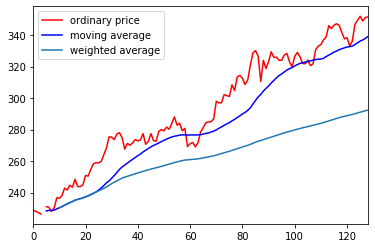

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#加载一些时间序列数据
path="D:\文档\Python Scripts\data_test\stock_price.csv"
data=pd.read_csv(path)
data.head()
data['Close'][4:5]=np.nan
data['Close'].plot(kind='line',color='r',label='ordinary price')
#rolling(250)与groupby很像，但不是分组，而是创建一个按照250分组的滑动窗口对象
#rolling().mean()是移动平均
data['Close'].rolling(25,min_periods=5).mean().plot(kind='line',color='b',label='moving average')


#要计算累计平均，用expanding
data['Close'].expanding(min_periods=10).mean().plot(label='weighted average')
plt.legend()

### 1.指数加权平均

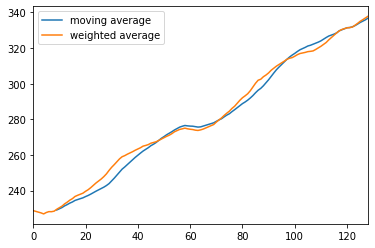

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path="D:\文档\Python Scripts\data_test\stock_price.csv"
data=pd.read_csv(path)

#另一种使用rolling的方法是定义一个衰减因子(decay factor)
#对比股价的30移动平均和span=30的移动加权平均
data['Close'].rolling(30,min_periods=10).mean().plot(label='moving average')
data['Close'].ewm(span=30).mean().plot(label='weighted average')
plt.legend()


### 2.二元窗口函数

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path="D:\文档\Python Scripts\data_test\stock_price1.csv"
data=pd.read_csv(path)
data.drop([0,1],axis=0,inplace=True)
data.head()
#有些统计运算需要在两个时间序列上进行，比如相关系数
#这个数据因为不规范所以读进来的数据都变成了str类型
data.dtypes
pct=data[['Close','Close.1']].applymap(float).pct_change()
#相当于显示移动相关系数
pct['Close'].rolling(10,min_periods=10).corr(pct['Close.1']).plot()

#累计相关系数，不过好像没什么用
pct['Close'].expanding(min_periods=10).corr(pct['Close.1']).plot()